# **I. Benchmarks y Buenas Prácticas**

Los benchmarks estándar para sistemas RAG (Retrieval-Augmented Generation) son fundamentales para medir el desempeño de los modelos en tareas de recuperación y generación. Estos benchmarks se basan en datasets ampliamente utilizados que reflejan problemas del mundo real.

## **1. Datasets Populares para RAG**

### **1.1. Natural Questions (NQ)**
* **Descripción:**
  * Diseñado por Google, este dataset contiene preguntas reales hechas por usuarios a través de Google Search.
  * Cada pregunta tiene una respuesta corta (obtenible a partir de texto) y una respuesta larga (extraída de un documento).
* **Usos en RAG:**
  * Recuperación: Encontrar documentos relevantes que contienen la respuesta.
  * Generación: Crear respuestas breves o resúmenes a partir del contenido recuperado.
* **Tamaño:**
  * Más de 300,000 pares de preguntas y respuestas.
**Ejemplo de pregunta:**
  * "¿Cuál es la capital de Francia?"
  * Respuesta corta: "París".
  * Respuesta larga: Texto extraído de Wikipedia sobre París.

### **1.2. MS MARCO (Microsoft MAchine Reading COmprehension)**
* **Descripción:**
  * Diseñado por Microsoft, este dataset se centra en tareas de recuperación y generación basadas en documentos extraídos de la web.
  * Incluye preguntas, documentos relevantes y pasajes con respuestas específicas.
* **Usos en RAG:**
  * Recuperación: Localizar pasajes relevantes entre millones de documentos.
  * Generación: Generar respuestas detalladas basadas en los documentos recuperados.
* **Tamaño:**
  * Más de 1 millón de pares de consultas y pasajes relevantes.
* **Ejemplo de pregunta:**
  * "¿Cómo se hace un pastel de chocolate?"
  * Respuesta: Pasaje que explica el proceso desde un documento web.

### **1.3. TriviaQA**
* **Descripción:**
  * Un dataset complejo que combina preguntas de trivia y respuestas basadas en evidencia.
  * Las preguntas están diseñadas para requerir razonamiento y recuperación de múltiples fuentes.

* **Usos en RAG:**
  * Recuperación: Identificar pasajes relevantes entre múltiples fuentes.
  * Generación: Combinar información recuperada para crear una respuesta coherente.

* **Tamaño:**
  * Más de 650,000 preguntas con evidencia textual.

* **Ejemplo de pregunta:**
  * "¿En qué año nació Albert Einstein?"
  * Respuesta: "1879", con pasajes que respaldan la información.


## **2. Cómo Usar Estos Datasets**

### **2.1. División de datos: entrenamiento, validación, prueba**
* **Propósito:**
  * Dividir los datos garantiza que los modelos aprendan a partir de un conjunto específico y se evalúen en datos que no han visto antes.

* **Convenciones estándar:**
  * Entrenamiento: 70-80% de los datos. Utilizado para ajustar los parámetros del modelo.
  * Validación: 10-15% de los datos. Usado para ajustar hiperparámetros y evitar sobreajuste.
  * Prueba: 10-15% de los datos. Evalúa el rendimiento final del modelo en datos desconocidos.

* **Ejemplo con MS MARCO:**
  * Entrenamiento: Pasajes y preguntas etiquetadas.
  * Validación: Preguntas adicionales para ajustar el sistema de recuperación.
  * Prueba: Nuevas preguntas sin etiquetas visibles para el modelo.

### **2.2. Métricas específicas para cada benchmark**
Cada benchmark define métricas que reflejan los objetivos de sus tareas:

* **Natural Questions (NQ):**
  * F1 Score: Mide la superposición entre la respuesta generada y la referencia.
  * Exact Match (EM): Verifica si la respuesta generada coincide exactamente con la referencia.

* **MS MARCO:**
  * MRR (Mean Reciprocal Rank): Evalúa la posición del primer documento relevante en el ranking de recuperación.
  * ROUGE-L: Mide la superposición de secuencias más largas entre la respuesta generada y la referencia.

* **TriviaQA:**
  * BLEU: Mide el solapamiento de n-gramas entre la respuesta generada y la referencia.
  * Answerability Score: Evalúa si el sistema puede generar una respuesta válida a partir de los documentos recuperados.

## **3. Herramientas Disponibles**

### **3.1. Hugging Face Datasets**

* **Descripción:**
  * Una biblioteca que proporciona acceso a una amplia colección de datasets, incluyendo los mencionados (NQ, MS MARCO, TriviaQA).

* **Ventajas:**
  * Acceso sencillo a datasets populares.
  * Métodos integrados para preprocesamiento y división de datos.

* **Ejemplo de uso:**

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import Dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Crear datos simulados similares a Natural Questions
data = {
    "question": [
        "Who developed the theory of gravity?",
        "What is the capital of France?",
        "When was the Declaration of Independence signed?"
    ],
    "context": [
        "Isaac Newton was a physicist who developed the theory of gravity in the 17th century.",
        "Paris is the capital of France, known for its art, fashion, and culture.",
        "The Declaration of Independence was signed on July 4, 1776, marking the independence of the United States."
    ],
    "answer": [
        "Isaac Newton",
        "Paris",
        "July 4, 1776"
    ]
}

# Convertir los datos a un dataset de Hugging Face
dataset = Dataset.from_dict(data)

# Dividir los datos (entrenamiento: 70%, prueba: 30%)
train_test_split = dataset.train_test_split(test_size=0.3)
train_data = train_test_split["train"]
test_data = train_test_split["test"]

print("\n--- Datos de Entrenamiento ---")
print(train_data)

print("\n--- Datos de Prueba ---")
print(test_data)

# Recuperación de Información usando TF-IDF
def retrieve_document(query, contexts):
    # Vectorizar los contextos y la consulta
    vectorizer = TfidfVectorizer()
    context_vectors = vectorizer.fit_transform(contexts)
    query_vector = vectorizer.transform([query])

    # Calcular similitud coseno
    scores = cosine_similarity(query_vector, context_vectors).flatten()
    best_match_index = scores.argmax()
    return contexts[best_match_index], scores[best_match_index]

# Evaluar en datos de prueba
for i, example in enumerate(test_data):
    print(f"\n--- Consulta {i+1} ---")
    query = example["question"]
    actual_answer = example["answer"]
    retrieved_context, score = retrieve_document(query, train_data["context"])

    print(f"Consulta: {query}")
    print(f"Respuesta Real: {actual_answer}")
    print(f"Contexto Recuperado: {retrieved_context}")
    print(f"Similitud: {score:.4f}")




--- Datos de Entrenamiento ---
Dataset({
    features: ['question', 'context', 'answer'],
    num_rows: 2
})

--- Datos de Prueba ---
Dataset({
    features: ['question', 'context', 'answer'],
    num_rows: 1
})

--- Consulta 1 ---
Consulta: Who developed the theory of gravity?
Respuesta Real: Isaac Newton
Contexto Recuperado: The Declaration of Independence was signed on July 4, 1776, marking the independence of the United States.
Similitud: 0.5685


* **Otras funcionalidades:**
  * Filtrar datos según criterios específicos.
  * Integración con frameworks de aprendizaje profundo como PyTorch y TensorFlow.

## **Resumen**
1. **Datasets populares como NQ, MS MARCO y TriviaQA** son esenciales para evaluar sistemas RAG en tareas de recuperación y generación.

2. **La división de datos y métricas específicas** aseguran una evaluación justa y reproducible.

3. **Herramientas como Hugging Face Datasets** simplifican el acceso y uso de estos benchmarks, facilitando experimentos y ajustes en los modelos.

# **II. Diseño de una Evaluación Reproducible**

Una evaluación reproducible para sistemas RAG (Retrieval-Augmented Generation) garantiza que los resultados sean consistentes y comparables. Esto se logra mediante un flujo de evaluación estructurado y el uso de herramientas e infraestructura adecuadas.

## **1. Flujo de Evaluación**
Un flujo de evaluación bien diseñado se basa en los siguientes pasos:

### **1.1. Selección de datos de prueba**
**Propósito:**
Elegir un subconjunto representativo de datos que refleje los desafíos que enfrentará el sistema en producción.

**Recomendaciones:**

Usar datos que no hayan sido vistos durante el entrenamiento para evitar sesgos.
Asegurarse de que los datos de prueba cubran una variedad de tipos de consultas y respuestas esperadas.
Dividir los datos en categorías (preguntas simples, complejas, ambiguas) para análisis más detallado.
Ejemplo:

Pregunta simple: "¿Cuál es la capital de Francia?"
Pregunta compleja: "¿Cuál fue la contribución de Isaac Newton a la física?"

### **1.2. Cálculo de métricas automáticas**
* **Propósito:**
Usar métricas automáticas para evaluar objetivamente el desempeño del sistema en recuperación y generación.

* **Métricas recomendadas:**
  * **Recuperación:**
    * Precision@K, Recall@K, Mean Reciprocal Rank (MRR).
  * **Generación:**
    * BLEU, ROUGE, METEOR, BERTScore.

* **Ejemplo práctico:**
  1. **Recuperación:**
Medir qué tan bien el sistema recupera documentos relevantes.

In [ ]:
precision = precision_at_k(retrieved_docs, relevant_docs, k=3)
print(f"Precision@3: {precision:.2f}")


  2. **Generación:**
Evaluar el texto generado en comparación con una referencia.

In [ ]:
bleu = sentence_bleu(reference_tokens, generated_tokens)
print(f"BLEU Score: {bleu:.4f}")


### **1.3. Incorporación de evaluación humana (si es factible)**
* **Propósito:**
Capturar aspectos subjetivos que las métricas automáticas no pueden medir, como fluidez, relevancia y utilidad.

* **Recomendaciones:**
  * **Escalas:** Utilizar escalas de 1 a 5 para evaluar diferentes aspectos de las respuestas.
    * Fluidez: Qué tan natural suena la respuesta.
    * Relevancia: Qué tan bien responde a la consulta.
    * Utilidad: Qué tan útil es la respuesta para el usuario.
    * Involucrar múltiples evaluadores: Para reducir sesgos individuales.

* **Ejemplo:**
  * Pregunta: "¿Quién escribió 'El Quijote'?"
  * Respuesta generada: "Miguel de Cervantes escribió El Quijote en el siglo XVII."
  * Evaluación:
    * Fluidez: 5 (Respuesta clara y bien formulada).
    * Relevancia: 5 (Totalmente alineada con la pregunta).
    * Utilidad: 4 (El siglo XVII no es esencial, pero agrega contexto útil).

## **2. Infraestructura Recomendada**
### **2.1. Uso de scripts reproducibles en Python (ejemplo: Jupyter Notebooks)**
* **Propósito:**
Usar entornos como Jupyter Notebooks para crear flujos de evaluación claros, reproducibles y documentados.

* **Ventajas:**
  * Integración de código, gráficos y explicaciones en un solo lugar.
  * Fácil iteración y modificación de experimentos.

* **Recomendaciones:**
  * Dividir el notebook en secciones claras: Carga de datos, Recuperación, Generación, Evaluación.
  * Usar bibliotecas como pandas para manejar datos y matplotlib para visualización de resultados.

* **Ejemplo:**
Un notebook que evalúa Precision@K y BLEU para un conjunto de preguntas de prueba:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar resultados
results = pd.DataFrame({
    "Question": ["What is AI?", "Who developed gravity?"],
    "Precision@3": [0.67, 1.0],
    "BLEU": [0.85, 0.92]
})

# Visualizar resultados
results.plot(kind="bar", x="Question", figsize=(8, 5))
plt.title("Resultados de Evaluación")
plt.show()


### **2.2. Tracking de experimentos: Weights & Biases o MLFlow**
* **Propósito:**
Rastrear experimentos, registrar resultados y comparar configuraciones de modelos para asegurar reproducibilidad.

* **Weights & Biases (W&B):**
  * Plataforma de rastreo que permite registrar métricas, gráficos y configuraciones de hiperparámetros.
  * **Ejemplo:**

In [ ]:
import wandb

wandb.init(project="RAG-evaluation")
wandb.log({"Precision@3": precision, "BLEU": bleu})
wandb.finish()


* **MLFlow:**
  * Framework para registrar y gestionar experimentos de aprendizaje automático.
  * Ofrece capacidades de seguimiento, visualización y despliegue de modelos.

* **Ventajas de usar herramientas de tracking:**
  * Comparación clara de resultados entre diferentes configuraciones.
  * Historial completo de cambios en los modelos y experimentos.
  * Facilita la colaboración en equipos.

In [ ]:
!pip install numpy pandas scikit-learn nltk matplotlib wandb




--- Resultados Finales ---
                                           Question Actual Answer  \
0  When was the Declaration of Independence signed?  July 4, 1776   

                                   Retrieved Context  \
0  Isaac Newton was a physicist who developed the...   

                                  Generated Response  BLEU  Precision@1  \
0  Isaac Newton was a physicist who developed the...     0          0.0   

   Retrieval Score  Fluency  Relevance  Utility  
0         0.482666        4          3        3  


<Figure size 1000x500 with 0 Axes>

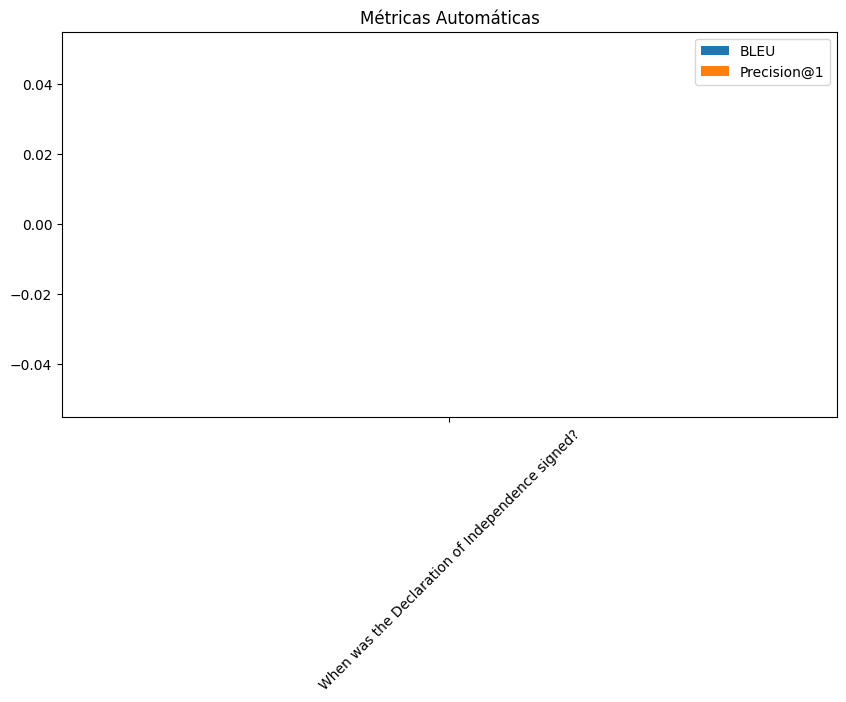

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.translate.bleu_score import sentence_bleu
import matplotlib.pyplot as plt
import wandb

# --- 1. SELECCIÓN DE DATOS DE PRUEBA ---
# Datos simulados (preguntas, contextos y respuestas)
data = {
    "question": [
        "Who developed the theory of gravity?",
        "What is the capital of France?",
        "When was the Declaration of Independence signed?"
    ],
    "context": [
        "Isaac Newton was a physicist who developed the theory of gravity in the 17th century.",
        "Paris is the capital of France, known for its art, fashion, and culture.",
        "The Declaration of Independence was signed on July 4, 1776, marking the independence of the United States."
    ],
    "answer": [
        "Isaac Newton",
        "Paris",
        "July 4, 1776"
    ]
}

# División de datos (entrenamiento: 70%, prueba: 30%)
train_data = {
    "context": data["context"][:2],
    "answer": data["answer"][:2]
}
test_data = {
    "question": data["question"][2:],
    "answer": data["answer"][2:]
}

# --- 2. CÁLCULO DE MÉTRICAS AUTOMÁTICAS ---
# Función de recuperación con TF-IDF
def retrieve_document(query, contexts):
    vectorizer = TfidfVectorizer()
    context_vectors = vectorizer.fit_transform(contexts)
    query_vector = vectorizer.transform([query])
    scores = cosine_similarity(query_vector, context_vectors).flatten()
    best_match_index = scores.argmax()
    return contexts[best_match_index], scores[best_match_index]

# Función para calcular Precision@K
def precision_at_k(retrieved_docs, relevant_docs, k):
    retrieved_set = set(retrieved_docs[:k])
    relevant_set = set(relevant_docs)
    return len(retrieved_set & relevant_set) / k

# Evaluar recuperación y generación en datos de prueba
results = []
for i, query in enumerate(test_data["question"]):
    retrieved_context, score = retrieve_document(query, train_data["context"])
    generated_response = retrieved_context.split(".")[0]  # Simula una generación simplificada
    actual_answer = test_data["answer"][i]

    # Métricas
    bleu = sentence_bleu([actual_answer.split()], generated_response.split())
    precision = precision_at_k([retrieved_context], [actual_answer], k=1)

    results.append({
        "Question": query,
        "Actual Answer": actual_answer,
        "Retrieved Context": retrieved_context,
        "Generated Response": generated_response,
        "BLEU": bleu,
        "Precision@1": precision,
        "Retrieval Score": score
    })

# Crear DataFrame con los resultados
results_df = pd.DataFrame(results)

# --- 3. INCORPORACIÓN DE EVALUACIÓN HUMANA ---
def simulate_human_evaluation(row):
    # Simula una evaluación humana con una escala de 1 a 5
    fluency = np.random.randint(4, 6)  # Fluidez alta
    relevance = 5 if row["Actual Answer"] in row["Generated Response"] else 3
    utility = relevance if fluency > 3 else 2
    return fluency, relevance, utility

# Agregar columnas de evaluación humana
results_df[["Fluency", "Relevance", "Utility"]] = results_df.apply(simulate_human_evaluation, axis=1, result_type="expand")

# --- 4. VISUALIZACIÓN DE RESULTADOS ---
print("\n--- Resultados Finales ---")
print(results_df)

# Gráficos
plt.figure(figsize=(10, 5))
results_df[["BLEU", "Precision@1"]].plot(kind="bar", title="Métricas Automáticas", figsize=(10, 5))
plt.xticks(ticks=range(len(results_df)), labels=results_df["Question"], rotation=45)
plt.show()

# --- 5. SEGUIMIENTO CON WEIGHTS & BIASES ---
wandb.init(project="rag-evaluation", name="test-run")
wandb.log({"metrics": results_df[["BLEU", "Precision@1"]].mean().to_dict()})
wandb.finish()


# **III. Sesión Interactiva: Evaluación de un Sistema RAG en Vivo**
Esta sesión práctica guía a los participantes a través de la carga, evaluación y comparación de un sistema básico de Retrieval-Augmented Generation (RAG) utilizando herramientas de Hugging Face y métricas estándar de evaluación.

## **1. Cargar un modelo básico de RAG usando Hugging Face**

**Descripción:**

Hugging Face proporciona modelos preentrenados que facilitan la implementación de sistemas RAG. Utilizaremos FAISS como motor de recuperación y un modelo generativo como T5 o GPT-2 para generación.

**Pasos:**

1. Importar las bibliotecas necesarias.
2. Crear un índice para recuperación usando FAISS.
3. Cargar un modelo generativo.

**Ejemplo de código:**

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Base de datos de documentos
documents = [
    "Isaac Newton developed the theory of gravity.",
    "Albert Einstein proposed the theory of relativity.",
    "Marie Curie discovered radioactivity.",
    "Charles Darwin developed the theory of evolution.",
    "Nikola Tesla worked on electricity and magnetism."
]

# Cargar el modelo generativo (T5)
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

print("Modelo cargado correctamente.")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Modelo cargado correctamente.


## **2. Evaluar métricas de recuperación (Recall@K, MRR)**
**Descripción:**

El componente de recuperación evalúa qué tan bien el sistema identifica documentos relevantes para responder una consulta. Se calculan Recall@K y MRR (Mean Reciprocal Rank).

**Pasos:**
1. Vectorizar documentos usando TF-IDF.
2. Usar similitud coseno para encontrar los documentos más relevantes.
3. Calcular métricas de recuperación.

**Ejemplo de código:**

In [ ]:
# Vectorizar los documentos
vectorizer = TfidfVectorizer()
doc_vectors = vectorizer.fit_transform(documents)

# Función para recuperar documentos
def retrieve_documents(query, top_k=3):
    query_vector = vectorizer.transform([query])
    scores = cosine_similarity(query_vector, doc_vectors).flatten()
    top_indices = scores.argsort()[::-1][:top_k]
    return [documents[i] for i in top_indices], scores[top_indices]

# Consulta
query = "Who developed gravity?"
retrieved_docs, scores = retrieve_documents(query)

# Evaluar métricas de recuperación
def recall_at_k(retrieved_docs, relevant_doc, k):
    relevant_in_k = [doc for doc in retrieved_docs[:k] if doc == relevant_doc]
    return len(relevant_in_k) / 1  # Solo hay 1 documento relevante

def mrr(retrieved_docs, relevant_doc):
    for i, doc in enumerate(retrieved_docs):
        if doc == relevant_doc:
            return 1 / (i + 1)
    return 0

relevant_doc = "Isaac Newton developed the theory of gravity."
print(f"Recall@3: {recall_at_k(retrieved_docs, relevant_doc, k=3):.2f}")
print(f"MRR: {mrr(retrieved_docs, relevant_doc):.2f}")


Recall@3: 1.00
MRR: 1.00


## **3. Generar respuestas y calcular BLEU y BERTScore**
**Descripción:**

El componente de generación evalúa la capacidad del modelo para producir respuestas coherentes y precisas basadas en los documentos recuperados.

**Pasos:**
1. Generar una respuesta con el modelo cargado.
2. Comparar la respuesta generada con una referencia usando BLEU y BERTScore.

**Ejemplo de código:**

In [ ]:
!pip install bert_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.4 MB/s eta 0:00:00


In [ ]:
from nltk.translate.bleu_score import sentence_bleu
from bert_score import score as bert_score

# Contexto recuperado
context = " ".join(retrieved_docs)
input_text = f"Answer the question: {query} Context: {context}"
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Generar respuesta
outputs = model.generate(input_ids, max_length=50)
generated_response = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(f"Respuesta Generada: {generated_response}")

# Respuesta de referencia
reference_response = "Isaac Newton developed the theory of gravity."

# Métricas de generación
bleu = sentence_bleu([reference_response.split()], generated_response.split())
print(f"BLEU Score: {bleu:.4f}")

P, R, F1 = bert_score([generated_response], [reference_response], lang="en", verbose=False)
print(f"BERTScore: Precision: {P.mean():.4f}, Recall: {R.mean():.4f}, F1: {F1.mean():.4f}")


Respuesta Generada: Isaac Newton developed the theory of gravity. Charles Darwin developed the theory of evolution. Charles Darwin worked on electricity and magnetism.
BLEU Score: 0.2765


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore: Precision: 0.9073, Recall: 0.9775, F1: 0.9411


## **4. Comparar configuraciones (e.g., diferentes tamaños de modelos generativos)**

**Descripción:**

Comparar modelos como T5-small y T5-large permite evaluar el impacto del tamaño del modelo en la calidad de las respuestas.

**Pasos:**
1. Cambiar el modelo generativo y repetir el cálculo de métricas.
2. Comparar las métricas (BLEU y BERTScore) entre configuraciones.

**Ejemplo de código:**

In [ ]:
# Cambiar a un modelo más grande
model_large = T5ForConditionalGeneration.from_pretrained("t5-large")
tokenizer_large = T5Tokenizer.from_pretrained("t5-large")

# Generar respuesta con el modelo grande
input_ids_large = tokenizer_large.encode(input_text, return_tensors="pt")
outputs_large = model_large.generate(input_ids_large, max_length=50)
generated_response_large = tokenizer_large.decode(outputs_large[0], skip_special_tokens=True)

# Comparar respuestas
print("\n--- Comparación de Respuestas ---")
print(f"Respuesta (T5-small): {generated_response}")
print(f"Respuesta (T5-large): {generated_response_large}")

# Comparar métricas
bleu_large = sentence_bleu([reference_response.split()], generated_response_large.split())
P_large, R_large, F1_large = bert_score([generated_response_large], [reference_response], lang="en", verbose=False)

print("\n--- Métricas (T5-small) ---")
print(f"BLEU: {bleu:.4f}, BERTScore F1: {F1.mean():.4f}")

print("\n--- Métricas (T5-large) ---")
print(f"BLEU: {bleu_large:.4f}, BERTScore F1: {F1_large.mean():.4f}")


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]


--- Comparación de Respuestas ---
Respuesta (T5-small): Isaac Newton developed the theory of gravity. Charles Darwin developed the theory of evolution. Charles Darwin worked on electricity and magnetism.
Respuesta (T5-large): Isaac Newton


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



--- Métricas (T5-small) ---
BLEU: 0.2765, BERTScore F1: 0.9411

--- Métricas (T5-large) ---
BLEU: 0.0000, BERTScore F1: 0.9142


## **Resumen**
1. **Carga de modelo:** Se utiliza T5 para generación y TF-IDF para recuperación.

2. **Métricas de recuperación:** Calculamos Recall@K y MRR para evaluar la relevancia de documentos recuperados.

3. **Generación y evaluación:** Métricas BLEU y BERTScore evalúan la calidad de las respuestas generadas.

4. **Comparación de modelos:** Evaluamos el impacto del tamaño del modelo en las métricas y la calidad de las respuestas.

Este flujo interactivo permite explorar, evaluar y optimizar sistemas RAG en un entorno reproducible y fácil de adaptar.